## Prisoners Dilemma

You are separately interrogating two suspects for a crime they committed together. Each prisoner has two options: cooperate with their partner by staying silent (cooperate) or betray their partner by confessing (defect). The outcomes depend on the combined choices:

* If both prisoners remain silent (cooperate), they both get a moderate sentence (let's say 1 year each) because there's not enough evidence to convict them of the main crime.

* If one prisoner betrays the other (defects) by confessing while the other remains silent (cooperates), the defector goes free (0 years) while the cooperator receives a severe sentence (let's say 5 years).

* If both prisoners betray each other (both defect), they both receive a harsh sentence (let's say 3 years each), but it's still less severe than if one stayed silent while the other betrayed them.

From an individual perspective, regardless of what the other person does, it seems better to defect (confess). If the partner stays silent, the defector goes free; if the partner confesses, it's better to confess and receive a lesser sentence than staying silent and getting a more severe penalty.

However, if both prisoners cooperated by staying silent, they would have collectively received a lighter sentence compared to when they both betrayed each other.

This dilemma arises because the optimal choice for an individual might not lead to the best collective outcome. It demonstrates the tension between individual rationality (aiming to minimize personal consequences) and collective rationality (aiming to maximize the overall benefit).

---

In this notebook we will explore prisoners filemma by simulating it. We will. see what happens when the game gets repeated. We will explore how to react to such scenarios. 

We will assume that you have got through basics in Python (data types, loop, conditional statement and functions). This notebook will build on top of that. First let us write off a payoff matrix and import the random library which we will use in the simulation. 

In [60]:
import random

# Define the payoff matrix
PAYOFF_MATRIX = {
    ('C', 'C'): (3, 3),
    ('C', 'D'): (0, 5),
    ('D', 'C'): (5, 0),
    ('D', 'D'): (1, 1),
}

Now let us simulate. We will encode a behaviorial pattern into functions and then play (simulate each of them against each other. The behaviorial patterns can be:

* Tit for Tat: It starts with cooperation and then mirrors the opponent's previous move. If the opponent cooperates, it continues to cooperate; if the opponent defects, it responds in kind. This strategy promotes cooperation and is forgiving, as it gives the other player a chance to return to cooperation.

* Always Cooperate: This strategy involves always choosing to cooperate regardless of the opponent's move. While it's cooperative and may lead to mutually beneficial outcomes if both players adopt this strategy, it's vulnerable to exploitation by defectors.

* Always Defect: Always choose to defect, aiming to maximize personal gain in the short term. While it might provide immediate benefits if the opponent cooperates, it often results in a worse collective outcome if both players adopt this strategy.

* Random: Make choices randomly or based on certain probabilities. Random strategies might seem unpredictable and can sometimes prevent opponents from exploiting a fixed pattern.

* Grudger: Start with cooperation but turn to permanent defection if the opponent defects at any point. It's forgiving initially but holds a grudge once the opponent betrays.

We create seperate functions for each of these strategies. It takes the opponents moves as a list `history`

In [93]:


# Define the strategies
def tit_for_tat(history):
    return 'C' if len(history) == 0 or history[-1] == 'C' else 'D'

def tit_for_two_tats(history):
    return 'C' if len(history) < 2 or (history[-1] == 'C' and history[-2] == 'C') else 'D'



def always_evil(history):
    return 'D'

def always_nice(history):
    return 'C'



We will now create a method to pit each of these *players* against each other. Our method will take in the two functions and the number of rounds that these players will play. At the end of each round we store the result of the previous round in the variable `history`

In [94]:
# Define the simulation function
def simulate(strategy1, strategy2, rounds, ):
    player1 = []
    player2 = []
    for _ in range(rounds):
        player1.append( strategy1(player2))
        player2.append(  strategy2(player1))
    return [(player1[i], player2[i]) for i in range(rounds)]

history  = simulate(tit_for_tat ,always_evil, 10 )
print(history)

[('C', 'D'), ('D', 'D'), ('D', 'D'), ('D', 'D'), ('D', 'D'), ('D', 'D'), ('D', 'D'), ('D', 'D'), ('D', 'D'), ('D', 'D')]


If we pit tit-for-tat against always-evil the results are bad for everyone. Results are always bad for everyone against always evil. In real life as in this simulation it makes sense to get out of abusive relationship where we know the outcome will always be bad. It makes sense to stop the game after betrayed for a few times.

---
Once we have obtained the history we need to find out how each of the players are doing. So we pull out our `PAYOFF_MATRIX` and map out the payoffs for the players. Lets check the payoff in the previous example

In [96]:
# Define the payoff calculator
def calculate_payoff(history):
    n = len(history)
    payoff1 = sum([ PAYOFF_MATRIX[move][0] for move in history])
    payoff2 = sum([ PAYOFF_MATRIX[move][1] for move in history])
    return payoff1/n, payoff2/n

payoff = calculate_payoff(history)

print(payoff)

(0.9, 1.4)


Tit-for-tat has lower payoff compared to always-evil. Tit-for-tat opens with a cooperation. The difference between the two scores is accounted by the first round. After the first round both the players settle on defect. How does tit Fot tat compare to the other strategies

---

We can write a function and enclose both players in two loops to list out all combinations for different players. We record the payoff from each game. After the loop the function sorts over the results by higest payoffs and prints the results


In [97]:

STRATEGIES = [tit_for_tat, tit_for_two_tats , always_evil , always_nice]

# Define the top level function
def run_simulation(rounds  ):
    results = []
    for strategy1 in STRATEGIES :
        for strategy2 in STRATEGIES :
            history = simulate(strategy1, strategy2, rounds, )
            payoff1, payoff2 = calculate_payoff(history)
            results.append(((strategy1.__name__, strategy2.__name__), payoff1, payoff2))
        #results.append(((strategy2.__name__, strategy1.__name__), payoff2, payoff1))
    results.sort(key=lambda x: (x[1], x[2]), reverse=True)
    for (strategy1, strategy2), payoff1, payoff2 in results:
        print(f"{strategy1.upper()} vs {strategy2}: {payoff1} - {payoff2}")

# Run the simulation
run_simulation(1000,)

ALWAYS_EVIL vs always_nice: 5.0 - 0.0
TIT_FOR_TAT vs tit_for_tat: 3.0 - 3.0
TIT_FOR_TAT vs tit_for_two_tats: 3.0 - 3.0
TIT_FOR_TAT vs always_nice: 3.0 - 3.0
TIT_FOR_TWO_TATS vs tit_for_tat: 3.0 - 3.0
TIT_FOR_TWO_TATS vs tit_for_two_tats: 3.0 - 3.0
TIT_FOR_TWO_TATS vs always_nice: 3.0 - 3.0
ALWAYS_NICE vs tit_for_tat: 3.0 - 3.0
ALWAYS_NICE vs tit_for_two_tats: 3.0 - 3.0
ALWAYS_NICE vs always_nice: 3.0 - 3.0
ALWAYS_EVIL vs tit_for_two_tats: 1.004 - 0.999
ALWAYS_EVIL vs tit_for_tat: 1.0 - 1.0
ALWAYS_EVIL vs always_evil: 1.0 - 1.0
TIT_FOR_TAT vs always_evil: 0.999 - 1.004
TIT_FOR_TWO_TATS vs always_evil: 0.998 - 1.008
ALWAYS_NICE vs always_evil: 0.0 - 5.0


Always Evil vs Always nice has most skewed payoff. Evil always defects and the nice always compromises. But the other games are more nuanced. Tit for tat has done well. It gets other players to compromise with itself since it starts with a compromise. In a universe where there are other startegies Always evil doesnot do good.

### Noise

But real world is noisy. Sometimes we misinterpret intensions of others. Because of our misinterpretation we may accuse someone who is innocent, similarly praise someone who has been crafty. In our simulation two tit-for-tat complte and settle to a mutauuly compromise. However if one player misreads a compromise as a defect because of the noise, It will toggle to defect. Both the players will switch betwen defect and compromise.

If a player misreads a compromise once again both the players will settle to defect. Noise leads to bad outcomes for everyone. In real world noise lowering trust in the society. Noise comes when independent institutions which are a barometer in the society get compromised. Noise effects a cost. 

----

Lets simulate noise in our system using the random library. For some measurements when the simulated value `random.random()` is greater than a threshold it will toggle the readings

In [98]:
def add_noise(move, noise = 0.05):
    if noise and random.random() < noise:
        return 'C' if move == 'D' else 'D'
    else: 
        return move

We modify our function `simulate()`. Before appending the history we add noise into the moves. We record the reponse to the noisy history. 

We also rewrite the top level function to incorporate noise. We have also added a summary statistics in `run_simulation()`. It will now also print out the average of all the interactions.

---

Modify the noise in the `run_simulation()` call and check the imapct on the average payoff.

In [108]:
STRATEGIES = [tit_for_tat, tit_for_two_tats , always_evil , always_nice]
# Define the simulation function

def simulate(strategy1, strategy2, rounds, noise =0.05):
    player1 = []
    player2 = []
    for _ in range(rounds):
        move1 = strategy1(player2)
        move2 = strategy2(player1)
        player1.append( add_noise(move1,noise))
        player2.append( add_noise(move2,noise))
    return [(player1[i], player2[i]) for i in range(rounds)]



# Define the top level function
def run_simulation(rounds = random.randint(39,109), noise =0.025, verbose =False, strategies = STRATEGIES):
    results = []
    stats = [{}]*len(strategies)
    labels = [st.__name__ for st in strategies]
    for i, strategy1 in enumerate(strategies) :
        for strategy2 in strategies :
            history = simulate(strategy1, strategy2, rounds, noise)
            payoff1, payoff2 = calculate_payoff(history)
            results.append(((strategy1.__name__, strategy2.__name__), payoff1, payoff2))
            stats[i] = { 'label':strategy1.__name__ ,  'value': stats[i].get('value',0) +payoff1}
    if verbose:
        results.sort(key=lambda x: (x[1], x[2]), reverse=True)
        print(f"Payoffs \n {' '.join(['-']*10)}")
        for (strategy1, strategy2), payoff1, payoff2 in results:
            print(f"{strategy1.upper()} vs {strategy2}: {payoff1} - {payoff2}")
        print(f"\n Average Scores \n {' '.join(['-']*10)}")
        stats.sort(key =lambda x :  x['value'] ,reverse=True)
        for i,val in enumerate(stats):
            print(f"{val['label'].upper()} : {val['value'] /len(strategies)} ")
    return results, stats
# Run the simulation
results, stats = run_simulation(rounds = 100, noise = 0.05,verbose =True,strategies = STRATEGIES)

Payoffs 
 - - - - - - - - - -
ALWAYS_EVIL vs always_nice: 4.69 - 0.19
TIT_FOR_TWO_TATS vs always_nice: 3.12 - 2.67
TIT_FOR_TAT vs always_nice: 2.98 - 2.83
ALWAYS_NICE vs always_nice: 2.89 - 2.99
ALWAYS_NICE vs tit_for_tat: 2.78 - 3.08
ALWAYS_NICE vs tit_for_two_tats: 2.57 - 3.17
TIT_FOR_TAT vs tit_for_tat: 2.04 - 2.19
ALWAYS_EVIL vs tit_for_tat: 1.55 - 1.2
TIT_FOR_TWO_TATS vs tit_for_tat: 1.53 - 1.28
TIT_FOR_TWO_TATS vs tit_for_two_tats: 1.27 - 1.17
ALWAYS_EVIL vs always_evil: 1.23 - 1.13
TIT_FOR_TWO_TATS vs always_evil: 1.22 - 1.17
TIT_FOR_TAT vs always_evil: 1.18 - 1.28
TIT_FOR_TAT vs tit_for_two_tats: 1.16 - 1.41
ALWAYS_EVIL vs tit_for_two_tats: 1.09 - 1.09
ALWAYS_NICE vs always_evil: 0.24 - 4.74

 Average Scores 
 - - - - - - - - - -
ALWAYS_EVIL : 2.14 
ALWAYS_NICE : 2.12 
TIT_FOR_TAT : 1.8399999999999999 
TIT_FOR_TWO_TATS : 1.785 


As the noise increase the payoff for every one decreases. The impact on each participant for noise is not equal. In a noisy enviornment defecting seems a better stategy. After a certain threshold always-evil becomes a best strategy. If your startegy is to defect you would want the environment to continue to be noisy. The games favour you.

How do we compendsate for noise in our strategy. We can try to be more forgiving. Tit-for-tat shoulnt be a puchover like always-evil but it could forgive a porion of the defects. If those defects arose from noise and the player is able to correct that. His opponent can realize the same. Lets check out how for the same noise level the outcome changes.

---

We encode a forgiving and carfty tit-fot-tat as opposite side of the spectrum. for 10% of the defects the forgiving tit-for-tat responds by cooperating. The crafty on the other hand responds by defecting. 

We will add this to our `STRATEGIES` and simulate the result.

In [122]:
def forgiving_tit_for_tat(history):
    forgive_ratio = 0.1   
    if len(history) == 0 or history[-1] == 'C' :
        return 'C'
    elif random.random() < forgive_ratio:
        return 'C'
    else:
        return 'D'

def crafty_tit_for_tat(history):
    avenge_ratio = 0.1   
    if len(history) == 0 :
        return 'C'
    elif  history[-1] == 'D' :
        return 'D'
    elif 'D' in history and random.random() < avenge_ratio:
        return 'D'
    else:
        return 'C'


STRATEGIES = [tit_for_tat, tit_for_two_tats, forgiving_tit_for_tat, always_evil, crafty_tit_for_tat, always_nice]
# Run the simulation
results, stats = run_simulation(1000, noise = 0.8, verbose=True,strategies = STRATEGIES)

Payoffs 
 - - - - - - - - - -
ALWAYS_NICE vs tit_for_two_tats: 3.813 - 0.823
ALWAYS_NICE vs always_evil: 3.81 - 0.9
TIT_FOR_TAT vs always_evil: 3.722 - 1.152
FORGIVING_TIT_FOR_TAT vs always_evil: 3.66 - 1.13
ALWAYS_NICE vs tit_for_tat: 3.473 - 0.943
CRAFTY_TIT_FOR_TAT vs always_evil: 3.445 - 1.455
TIT_FOR_TWO_TATS vs always_evil: 3.385 - 1.6
ALWAYS_NICE vs crafty_tit_for_tat: 3.344 - 1.049
TIT_FOR_TAT vs tit_for_two_tats: 3.254 - 1.489
ALWAYS_NICE vs forgiving_tit_for_tat: 3.239 - 1.034
FORGIVING_TIT_FOR_TAT vs tit_for_two_tats: 3.171 - 1.541
CRAFTY_TIT_FOR_TAT vs tit_for_two_tats: 3.058 - 1.718
ALWAYS_EVIL vs always_evil: 2.739 - 2.784
TIT_FOR_TAT vs crafty_tit_for_tat: 2.506 - 1.996
FORGIVING_TIT_FOR_TAT vs crafty_tit_for_tat: 2.498 - 1.988
CRAFTY_TIT_FOR_TAT vs crafty_tit_for_tat: 2.411 - 2.156
TIT_FOR_TWO_TATS vs tit_for_two_tats: 2.406 - 2.431
FORGIVING_TIT_FOR_TAT vs tit_for_tat: 2.402 - 2.022
TIT_FOR_TAT vs tit_for_tat: 2.162 - 2.332
FORGIVING_TIT_FOR_TAT vs forgiving_tit_for_ta

It is intersting to note that once we introduce a little noise into the simulation, Always-nice becomes the most succesfull startegy. Then as the noise increases to 0.2 always-evil becomes the most succesfull. Again when the noise increases to over 50% always-nice once again comes onto the top. 

---

We will encode a couple more strategies. A grudge which acts nice till you defect and then it keeps on defecting. And a random strategy. 

In [68]:
def grudge(history):  
    if len(history) == 0 :
        return 'C'
    elif 'D' in history:
        return 'D'
    else:
        return 'C'

def random_strategy(history):
    pivot_ratio = 0.5   
    if random.random() > pivot_ratio : return 'D'
    else:
        return 'C'


STRATEGIES = [tit_for_tat, tit_for_two_tats, forgiving_tit_for_tat, random_strategy,
              always_evil, grudge, vengeful_tit_for_tat, always_nice]

### Natural Selection

We will now pass on all these strategies into a model which simulates evollution. Each generation of players will inteact with a group of players. At the end of the generation the most suucessful players will be able to regenerate by creating 1 or more copies of themselves. The least suucessful players die off without making capies of themselves. As in nature succesfull strategies will be naturally selected. 

---
The function below is used to generate plots. We wont go into the details as we are covering basics on python. The function takes in the history and draws a line plot.

In [90]:
import matplotlib.pyplot as plt
def stack_plot(history):
    no_change = len(history)
    for i, element in enumerate(history[1:], start=1):
        if element  == history[i-1]:
            no_change = i
            break
    population_history  = history[:no_change]
    populations = list(map(list, zip(*population_history)))

    # Create the area plot
    plt.figure(figsize=(10,8))
    #plt.plot(range(len(population_history)), populations, labels=[f"{STRATEGIES[i].__name__} " for i in range(len(populations))])
    for i in range(len(populations)):
        plt.plot(range(len(population_history)), populations[i], label=f"{STRATEGIES[i].__name__}")

    plt.legend(loc='lower right')
    plt.xlabel("Generation")
    plt.ylabel("Population")
    plt.title("Population History")
    plt.show()

The `simulate-population()` function incorporates the previous function we have coded. It will create a population of players `populate()` given a split of different strategies present in a generation. Once a population is created the are marked off into groups. Each group plays within itself and reports result into the payoff ledger. At the end of the round the strongest players regenrate while poor players are wiped out.

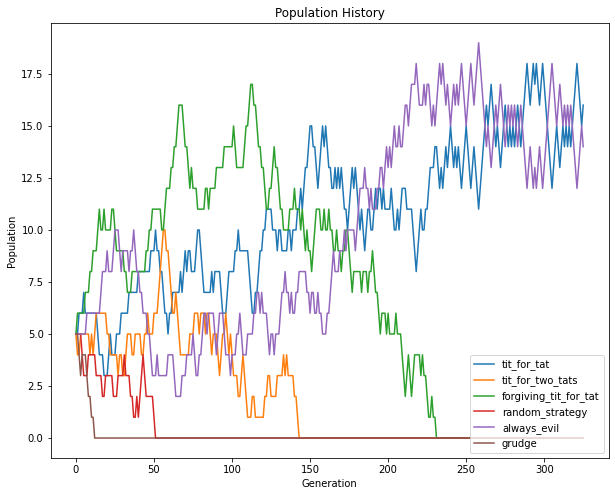

In [92]:

# Define the population simulation
def simulate_population(strategies = STRATEGIES[:6], group=5,plays=10,
                        history =[], rounds=10, noise=0.1, 
                        regenerate=0.05, dies = 0.05):
    if (len(history) != len(strategies)) or  sum(history)%2:
        history = [5]*len(strategies)
    strength  = sum(history)
    labels = list(range(strength))

    history =[history]
    def populate(epoch):
        population =[]
        for i,strategy in enumerate(epoch):
            population = population + [i]*strategy
        random.shuffle(population)
        return population
    for i in range(rounds):
        population = populate(history[i])
        payoffs = [0]*len(population)
        for g in range(0, len(population), group):
            gp_population = population[g:g+group]
            gp_strategy = [ strategies[p] for p in gp_population]
            _, stats = run_simulation(rounds = plays, noise =0.025,strategies = gp_strategy)
            payoffs[g:g+group] = [ stat['value'] for stat in stats]
        #print(population, [int(p) for p in payoffs])
        population.sort(key=payoffs.__getitem__, reverse=False)
        
        del population[- int(strength*dies) :]
        population = population + population[: int(strength*regenerate)]
        stats = [0]*len(strategies)
        for player in population:
            stats[player] += 1
        history.append(stats)
    stack_plot(history)
    return history

history = simulate_population(history = [200]*len(STRATEGIES), rounds =800,noise=0.025)


The graph above shows the history for each generation. The x-axis represents a generation starting from the 0. The y axis represents the population. At the start each strategy had the same population. With each genaration some startegies loose out and decline while others are reinfrced and expand.

The final strategy did not start off as the clear winner. This is similar to our observation is real life. When we do fermentation for example different species of bacteria dominate during different phases, when the conditions suit them the most.

The simulation outcome is not repeatable. The noise in the inital rounds: which participant gets grouped together, where are the misinterpretation has a strng impact on the latter stages of the evvolution. In some cases cooperative strateies dominate and in other always-evil dominates.


###  Epilogue
